### Implements algorithm 1 in the parti-game [paper](https://link.springer.com/content/pdf/10.1007/BF00993591.pdf)

Learn a controller from a start region to a goal region on a continuous space; Four increasingly effective algorithms to partition discrete state spaces. Algorithm 1 and 2 are non-learning; 3 and 4 learn, hence explore, the world while planning a route to the goal. Here, I implement algorithm 1

In [1]:
import sys
import numpy as np
from os.path import abspath, join
sys.path.append(abspath(join('..')))
sys.path.append(abspath(join('..', 'grids')))
sys.path.append(abspath(join('..', 'utils')))
sys.path.append(abspath(join('..', 'Visualization')))
sys.path.append(abspath(join('..')))

from Grids import *
import matplotlib.pyplot as plt
from Utilities import *
from BoundaryCondition import *
from Visualization import Visualizer
from ValueFuncs import proj
from math import pi
from InitialConditions import shapeCylinder
%matplotlib inline

### A Basic 2-D Grid and a signed distance function cylinder

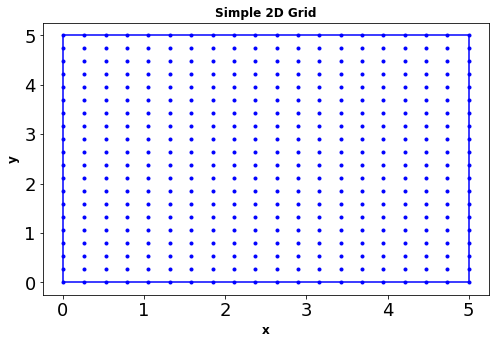

In [2]:
from math import pi
gridMin = np.array([[0,0]])
gridMax = np.array([[5, 5]])
N = 20 *np.ones((2,1)).astype(np.int64)
g = createGrid(gridMin, gridMax, N, low_mem=False, process=True)


viz = Visualizer(winsize=(8, 5))
viz.visGrid([g], g.dim, title='Simple 2D Grid')

### A 3-D Grid and a signed distance function cylinder

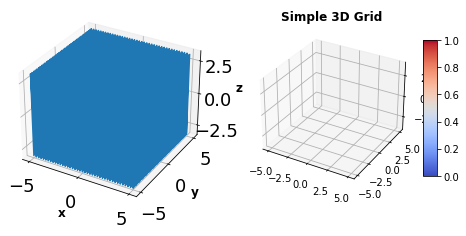

In [3]:

grid_min = expand(np.array((-5, -5, -pi)), ax = 1); # Lower corner of computation domain
grid_max = expand(np.array((5, 5, pi)), ax = 1);   # Upper corner of computation domain
N = 41*ones(3, 1).astype(np.int64)
pdDims = 3;               # 3rd dimension is periodic
g = createGrid(grid_min, grid_max, N, pdDims);

data0 = shapeCylinder(g, 3, zeros(len(N), 1), radius=1)

viz = Visualizer(winsize=(8, 5))
viz.visGrid(g, g.dim, title='Simple 3D Grid')

### A 4-D Grid

Split into two; and project the split grids back to 2D 

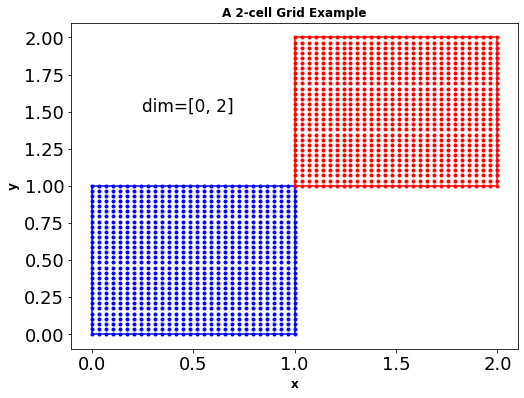

In [4]:
# this is same as sepGrid_test
num_points=30
gridIn=expand(np.array((0, 1, 0, 1)), 1)
gridOut =expand(np.array((1, 2, 1, 2)), 1)
N = num_points*ones(4,1).astype(np.int64)
g = createGrid(gridIn, gridOut, N, process=False, low_mem=True);

# print(f'len(g.xs), g.xs[0].shape {len(g.xs), g.xs[0].shape} g.N {g.N.shape}')
dims = [[0, 2], [1, 3]]

gs, ds = sepGrid(g, dims);

# Visualize
viz = Visualizer(winsize=(8, 6))
viz.visGrid(gs, dim= len(gs), dims=dims, title=f'A {len(gs)}-cell Grid Example')

### A 4-D Grid Split into 4 subgrids; 

+ re-projected the split grids back to 2D

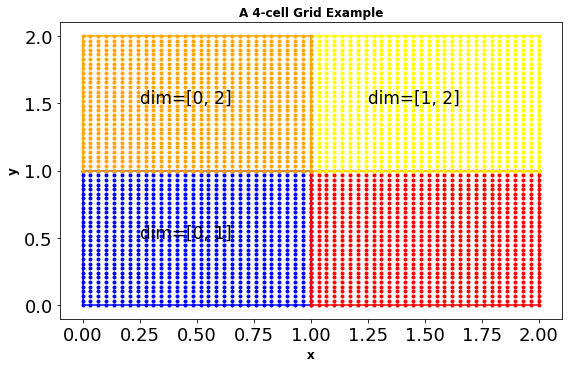

In [5]:
# 4 subcells grid
num_points=30
gridIn=expand(np.array((0, 1, 0, 1)), 1)
gridOut =expand(np.array((1, 2, 1, 2)), 1)
N = num_points*ones(4,1).astype(np.int64)
g = createGrid(gridIn, gridOut, N, process=True, low_mem=True);

# print(f'len(g.xs), g.xs[0].shape {len(g.xs), g.xs[0].shape} g.N {g.N.shape}')
dims = [[0, 2], [1, 2],  [1, 3], [0, 1]]

gs, dat = sepGrid(g, dims);

viz = Visualizer(winsize=(8, 5))

viz.visGrid(gs, len(gs), title=f'A {len(gs)}-cell Grid Example', dims=dims)

### An Eight-Grid Cell

+ Be careful with the number of points here 
+ as too many points can cause memory issues

Grid dimension > 5, may be dangerously large


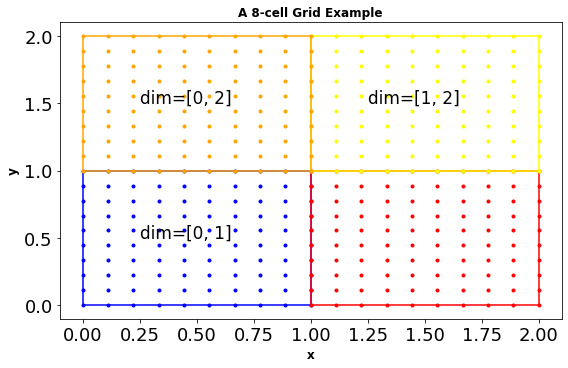

In [8]:
## Cells Division Example | Lekan August 05

gridIn= expand(np.array((0, 1, 0, 1, 1, 2, 1, 2)), 1)
gridOut =expand(np.array((1, 2, 1, 2, 2, 3, 2, 3)), 1)

num_points = 10
N = num_points*ones(8,1).astype(np.int64)

g = createGrid(gridIn, gridOut, N, process=True);

dims = [[0, 2], [1, 2],  [1, 3], [0, 1]]
gs, data = sepGrid(g, dims);
len(gs)
viz = Visualizer(winsize=(8, 5))
viz.visGrid(gs, len(gs), title=f'A {len(N)}-sub-grid Example', dims=dims)

In [ ]:
# given a grid, partition it into x number of cells
# the cells must be non-overlapping orthotopes
def partition_grid(g, cell_nums):
    for dimnum in range(g.dim):
        dim_x = g.max[dimnum, 0]-g.min[dimnum, 0]
        dim_y = g.max[dimnum, 1]-g.min[dimnum, 1]
        # figure out which dim is longer and use longer dim to divide
        larger_dim = dim_x if dim_x > dim_y else dim_y
        if cell_nums==2:
            new_dim_x = dim_x /2
            new_dim_y = dim_y /2
            
        for i in range(cell_nums):
            
    